 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_path = Path("./Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_path, index_col="Date")
whale_returns_df.index = pd.to_datetime(whale_returns_df.index)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df.dropna(inplace = True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_path, index_col="Date")
algo_returns_df.index = pd.to_datetime(algo_returns_df.index)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
# Count nulls
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_path = Path("./Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_path,index_col="Date")
sp_tsx_df.index = pd.to_datetime(sp_tsx_df.index)

sp_tsx_df.head()


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [15]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [18]:
# Fix Data Types
##sp_tsx_df["Close"] = pd.to_numeric(sp_tsx_df["Close"])
##sp_tsx_df

def clean(x):
    
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

sp_tsx_df['Close']=sp_tsx_df['Close'].apply(clean).astype('float')

In [19]:
# Calculate Daily Returns

daily_returns = sp_tsx_df.pct_change()
daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [20]:
# Drop nulls

daily_returns.dropna(inplace=True)
daily_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [21]:
# Rename `Close` Column to be specific to this portfolio.

daily_returns.rename(columns={'Close':'SP TSX'}, inplace=True)
daily_returns=pd.DataFrame(daily_returns)
daily_returns


,SP TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_portfolio_df = pd.concat([whale_returns_df,algo_returns_df,daily_returns], axis=1, join = 'inner')
combined_portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date', ylabel='% Change'>

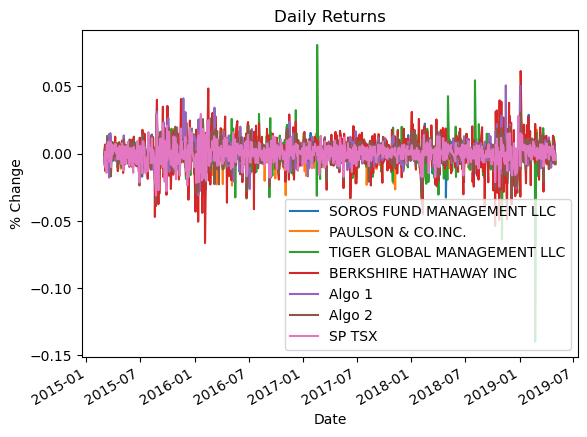

In [23]:
# Plot daily returns of all portfolios
combined_portfolio_df.plot(ylabel='% Change', title = 'Daily Returns')

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date', ylabel='% Change'>

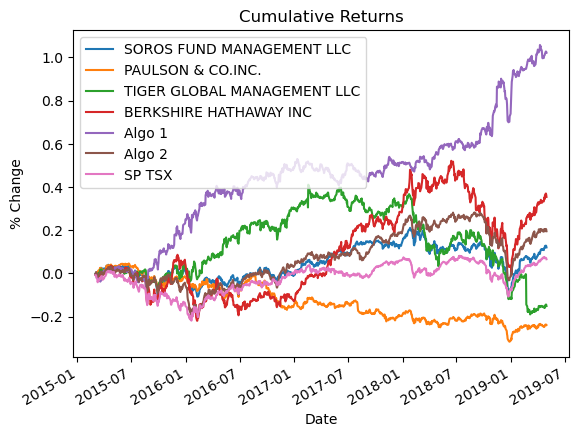

In [26]:
# Calculate cumulative returns of all portfolios
def cumula_return(combined_portfolio_df):
    cumulative_combined_df=(1 + combined_portfolio_df).cumprod()-1
    return cumulative_combined_df

# Plot cumulative returns
cumulative_combined_df=cumula_return(combined_portfolio_df)
cumulative_combined_df.plot(ylabel='% Change',title = 'Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

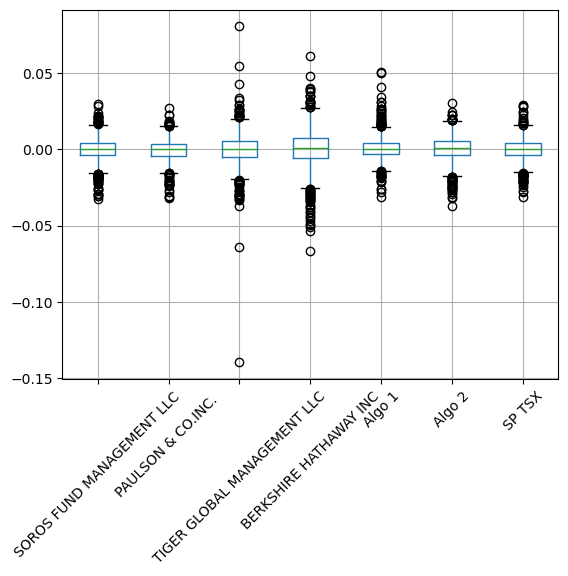

In [27]:
# Box plot to visually show risk
combined_portfolio_df.boxplot(rot=45)

### Calculate Standard Deviations

In [28]:
# Calculate the daily standard deviations of all portfolios
portfolio_vol_daily = combined_portfolio_df.std()
portfolio_vol_daily

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP TSX                         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [31]:
# Calculate  the daily standard deviation of S&P TSX 60

vol_sp_tsx_daily = daily_returns.std()

# Determine which portfolios are riskier than the S&P TSX 60
for volitiledx in portfolio_vol_daily.index:
    if portfolio_vol_daily[volidx]>vol_sp_tsx_daily[0] and volitiledx!='SP TSX':
        print(volitiledx)
print("These portfolios higher standard derivation (more riskier) than the S&P TSX 60")

SOROS FUND MANAGEMENT LLC
PAULSON & CO.INC. 
TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC
Algo 1
Algo 2
These portfolios higher standard derivation (more riskier) than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)
def annul_std(df):
    return df.std()*np.sqrt(252)
portfolio_vol = annul_std(combined_portfolio_df)
portfolio_vol



SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP TSX                         0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

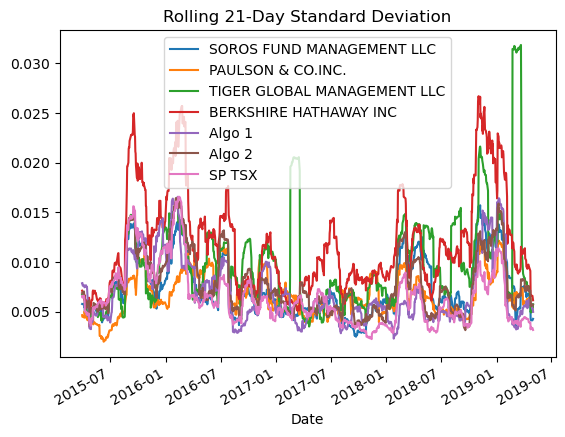

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_vol_rolling_daily = combined_portfolio_df.rolling(21).std()

# Plot the rolling standard deviation
portfolio_vol_rolling_daily.plot(title='Rolling 21-Day Standard Deviation')


### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<Axes: >

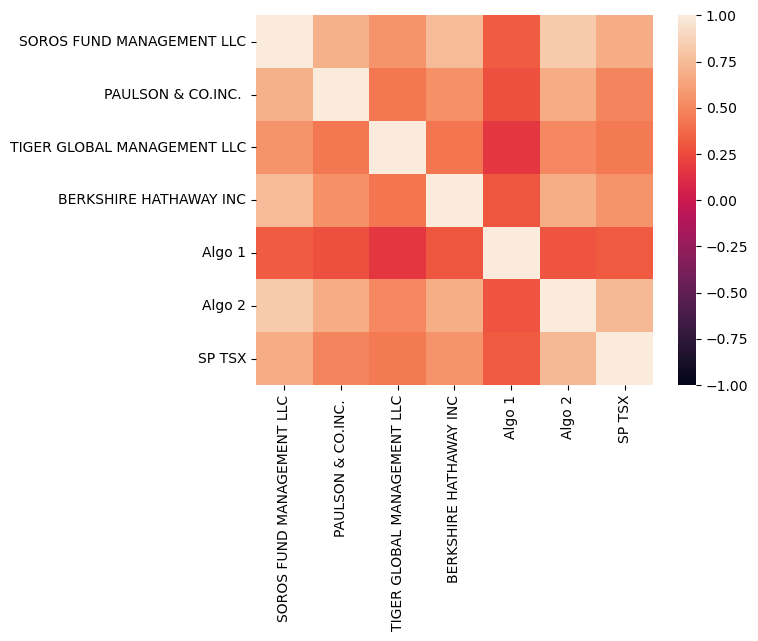

In [34]:
# Calculate the correlation
portfolio_daily_return_correlation = combined_portfolio_df.corr()
display(portfolio_daily_return_correlation)

# Display de correlation matrix
import seaborn as sns
sns.heatmap(portfolio_daily_return_correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

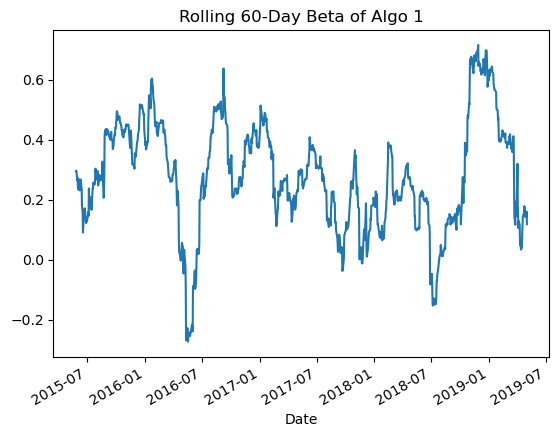

In [44]:
# Calculate covariance of a single portfolio

def beta(portfolio1, market):
    rolling_covariance= portfolio1.rolling(60).cov(market)
     
# Calculate variance of S&P TSX
    rolling_variance = market.rolling(60).var()

# Computing beta
    rolling_beta = rolling_covariance / rolling_variance
    return rolling_beta

rolling_beta = beta(combined_portfolio_df['Algo 1'], combined_portfolio_df['SP TSX'])
rolling_beta

# Plot beta trend
rolling_beta.plot(title='Rolling 60-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [45]:
# Use `ewm` to calculate the rolling window

portfolio_rolling_ewmstd = combined_portfolio_df.ewm(halflife=21).std()
portfolio_rolling_ewmstd

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Annualized Sharpe Ratios
def sharpe_ratio(portfolios, annul):
    if annul:
        sharpe_ratios = portfolios.mean()/portfolios.std()
        return sharpe_ratios.mul(np.sqrt(252))
    else:
        return sharpe_ratios
    
annual_sharpe_ratios = sharpe_ratio(combined_portfolio_df, annul=True)
annual_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP TSX                         0.195550
dtype: float64

<Axes: title={'center': 'Annualized Sharpe Ratio'}, ylabel='Sharp Ratio'>

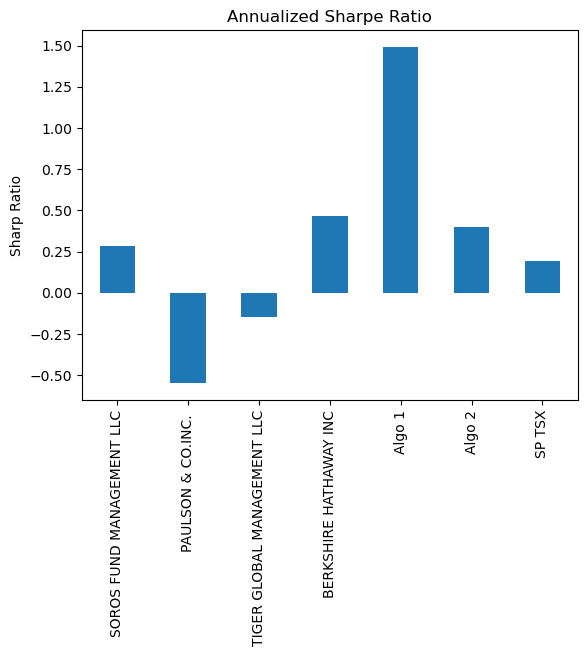

In [48]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot.bar(title='Annualized Sharpe Ratio', ylabel='Sharp Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

1. (Algo 1 & Algo 2) have higher annualized Sharpe ratios than the market (S&P TSX 60) and the majority of the whales' portfolios (SOROS FUND MANAGEMENT LLC, PAULSON CO. INC, TIGER GLOBAL MANAGEMENT LLC). 

2. the BERKSHIRE HATHAWAY INC portfolio has a higher annualized Sharpe ratio than the Algo 2 strategy. At the same time, both algorithmic strategies (Algo 1 and Algo 2) have slightly higher annual standard deviations (a risk factor) than the market (S&P TSX 60) and some of the whales' portfolios.

In summary, the Algo 1 algorithmic strategy outperforms both the market (S&P TSX 60) and the whales' portfolios with moderate risk and good returns. The Algo 2 algorithmic strategy outperforms only the market (S&P TSX 60) and some of the whales' portfolios, but not the BERKSHIRE HATHAWAY INC portfolio and Algo 1.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [80]:
# Reading data from 1st stock
shop_path = Path("./Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_path, index_col = 'Date')

In [62]:
# Reading data from 2nd stock
cost_path = Path("./Resources/COST_historical.csv")
cost_df = pd.read_csv(cost_path, index_col = 'Date')

In [63]:
# Reading data from 3rd stock
adbe_path = Path("./Resources/ADBE_historical.csv")
adbe_df = pd.read_csv(adbe_path, index_col='Date')

In [72]:
# Reading data from 4th stock
googl_path = Path("./Resources/GOOGL_historical.csv")
googl_df = pd.read_csv(googl_path, index_col='Date')

In [76]:
# Reading data from 4th stock
pg_path = Path("./Resources/PG_historical.csv")
pg_df = pd.read_csv(pg_path, index_col = 'Date')

In [82]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([shop_df, cost_df, adbe_df, googl_df, pg_df], axis=1, join='inner')
combined_df

,Close,Close,Close,Close,Close
Date,,,,,
1/2/2018 16:00:00,10.55,188.32,177.70,53.66,90.65
1/3/2018 16:00:00,10.78,190.58,181.04,54.58,90.54
1/4/2018 16:00:00,11.00,189.10,183.22,54.79,91.18
1/5/2018 16:00:00,11.06,187.75,185.34,55.51,91.24
1/8/2018 16:00:00,11.24,188.48,185.04,55.71,91.72
...,...,...,...,...,...
12/23/2019 16:00:00,38.91,293.31,328.95,67.53,124.90
12/24/2019 13:00:00,39.94,294.23,329.64,67.22,125.22
12/26/2019 16:00:00,40.88,295.73,331.20,68.12,125.22


In [83]:
# Reset Date index

combined_df.index = pd.to_datetime(combined_df.index).normalize()
combined_df

,Close,Close,Close,Close,Close
Date,,,,,
2018-01-02,10.55,188.32,177.70,53.66,90.65
2018-01-03,10.78,190.58,181.04,54.58,90.54
2018-01-04,11.00,189.10,183.22,54.79,91.18
2018-01-05,11.06,187.75,185.34,55.51,91.24
2018-01-08,11.24,188.48,185.04,55.71,91.72
...,...,...,...,...,...
2019-12-23,38.91,293.31,328.95,67.53,124.90
2019-12-24,39.94,294.23,329.64,67.22,125.22
2019-12-26,40.88,295.73,331.20,68.12,125.22


In [85]:
# Reorganize portfolio data by having a column per symbol

combined_df.columns = ["SHOP", "COST", "ADBE", "GOOGLE", "PG"]
combined_df

,SHOP,COST,ADBE,GOOGLE,PG
Date,,,,,
2018-01-02,10.55,188.32,177.70,53.66,90.65
2018-01-03,10.78,190.58,181.04,54.58,90.54
2018-01-04,11.00,189.10,183.22,54.79,91.18
2018-01-05,11.06,187.75,185.34,55.51,91.24
2018-01-08,11.24,188.48,185.04,55.71,91.72
...,...,...,...,...,...
2019-12-23,38.91,293.31,328.95,67.53,124.90
2019-12-24,39.94,294.23,329.64,67.22,125.22
2019-12-26,40.88,295.73,331.20,68.12,125.22


In [86]:
# Calculate daily returns

combined_daily_returns = combined_df.pct_change()

# Drop NAs

combined_daily_returns.dropna(inplace=True)

# Display sample data
combined_daily_returns


,SHOP,COST,ADBE,GOOGLE,PG
Date,,,,,
2018-01-03,0.021801,0.012001,0.018796,0.017145,-0.001213
2018-01-04,0.020408,-0.007766,0.012042,0.003848,0.007069
2018-01-05,0.005455,-0.007139,0.011571,0.013141,0.000658
2018-01-08,0.016275,0.003888,-0.001619,0.003603,0.005261
2018-01-09,-0.015125,-0.011619,0.008971,-0.001257,-0.007305
...,...,...,...,...,...
2019-12-23,-0.002563,-0.005156,0.004090,-0.000444,-0.003669
2019-12-24,0.026471,0.003137,0.002098,-0.004591,0.002562
2019-12-26,0.023535,0.005098,0.004732,0.013389,0.000000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [87]:
# Set weights

weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return

portfolio_return = combined_daily_returns.dot(weights)

# Display sample data

portfolio_return


Date
2018-01-03    0.013706
2018-01-04    0.007120
2018-01-05    0.004737
2018-01-08    0.005482
2018-01-09   -0.005267
                ...   
2019-12-23   -0.001548
2019-12-24    0.005935
2019-12-26    0.009351
2019-12-27   -0.001490
2019-12-30   -0.011222
Length: 501, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [89]:
# Join your returns DataFrame to the original returns DataFrame

custom_df=portfolio_return.to_frame(name="Customized")
custom_df.index=pd.to_datetime(custom_df.index)
joined_portfolio_df=combined_portfolio_df.join(custom_df, on='Date')

In [90]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

portfolio_df=joined_portfolio_df.dropna()
portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX,Customized
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.013706
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.007120
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.004737
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.005482
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.005267
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.000643
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.011236
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.007394


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [91]:
# Calculate the annualized `std`

annual_portfolio_std = annul_std(portfolio_df)
annual_portfolio_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
SP TSX                         0.099121
Customized                     0.221882
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

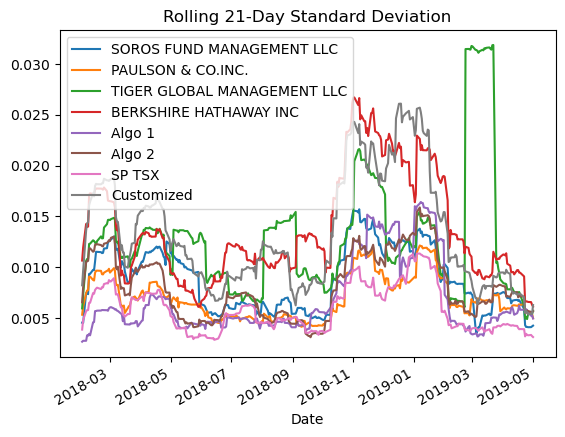

In [92]:
# Calculate rolling standard deviation

portfolio_std_rolling = portfolio_df.rolling(21).std()

# Plot rolling standard deviation
portfolio_std_rolling.plot(title='Rolling 21-Day Standard Deviation')



### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX,Customized
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.726754
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.599025
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.437035
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.826591
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.232915
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.747161
SP TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.608784
Customized,0.726754,0.599025,0.437035,0.826591,0.232915,0.747161,0.608784,1.000000


<Axes: >

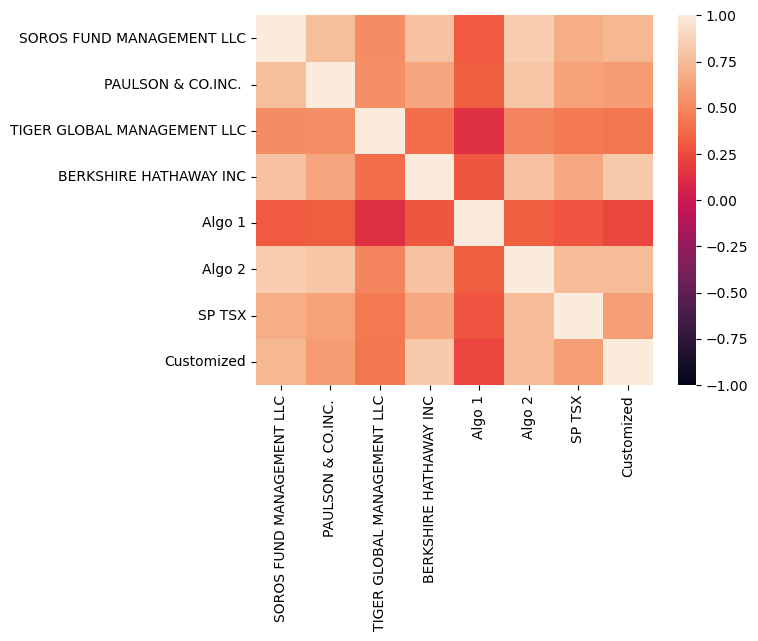

In [93]:
# Calculate and plot the correlation

portfolio_correlation = portfolio_df.corr()
display(portfolio_correlation)
sns.heatmap(portfolio_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta of Customized portoflio'}, xlabel='Date'>

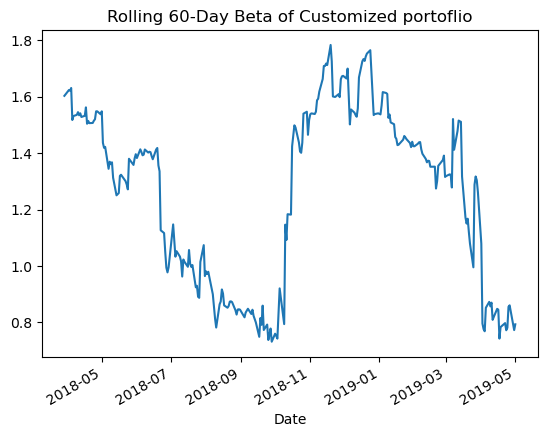

In [94]:
# Calculate and plot Beta

custom_rolling_beta = beta(portfolio_df['Customized'], portfolio_df['SP TSX'])

custom_rolling_beta.plot(title='Rolling 60-Day Beta of Customized portoflio')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [95]:
# Calculate Annualized Sharpe Ratios

annual_sharpe_ratios_n = sharpe_ratio(portfolio_df, annul=True)
annual_sharpe_ratios_n


SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
SP TSX                         0.034651
Customized                     1.261374
dtype: float64

<Axes: title={'center': 'Annualized Sharpe Ratio'}, ylabel='Sharp Ratio'>

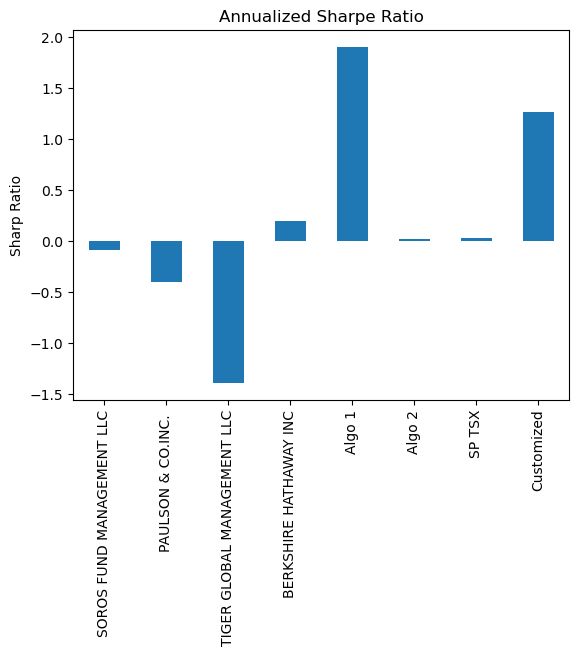

In [96]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios_n.plot.bar(title='Annualized Sharpe Ratio', ylabel='Sharp Ratio')

### How does your portfolio do?

customized portfolio having second highest annual sharpe ratio compared to other porfolios and the market (S&P TSX 60), which indicate the return-over-risk perfomance is better than majority of the other porfolios except Algo 1 algorithmic strategies.

The customized portfolio is high risk with high return portfolio, which indicates greater uncertainty (risks) of the high return in the future performance.